<a href="https://colab.research.google.com/github/Harishacoursera/Play-Store-Analysis-EDA-AlmaBetter/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_Harisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Play Store App Review Analysis(EDA)
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.




#<b> Import libraries/packages


In [2]:
pip install pandas 

In [3]:
!pip install jovian opendatasets
import jovian

     |████████████████████████████████| 68 kB 3.8 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6502 sha256=3dd635d968260c226314714086f98c277eeddcff44fcf3e5406ea8a0042dce10
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [4]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 12.1 MB 35.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 66.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516249 sha256=b9961fa267da40465c6d9004a8e4217468359256dee79ff661568f000111ad90
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=94afc9eb885c2df212e59774cbf7df55fb6515e2107e8fa68d2476924bc997b1
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [5]:
!pip install jovian opendatasets --upgrade --quiet

In [90]:
!pip install seaborn.color_palette

ERROR: Could not find a version that satisfies the requirement seaborn.color_palette (from versions: none)
ERROR: No matching distribution found for seaborn.color_palette


In [6]:
#import library
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline
import jovian
from scipy import stats

#<b> Loading Datasets

In [7]:
#read to Plays store csv files
apps_df = pd.read_csv('/content/drive/MyDrive/PROJECT/Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/PROJECT/User Reviews.csv')

###Checking for Columns in the dataset-Play store data.csv

In [ ]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
print('Number of Rows',apps_df.shape[0])
print('Number of Columns',apps_df.shape[1])#To Find shape of our Dataset(no.of rows & coloumns)

Number of Rows 10841
Number of Columns 13


###Understanding data sets

In [13]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


###To Understand overall statistics about the dataframe

In [15]:
apps_df.describe(include='all')#Overall statistics about the df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


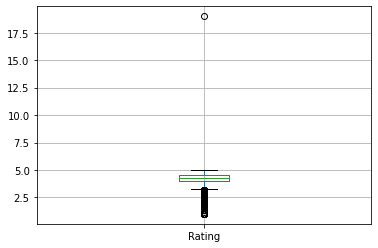

In [17]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa624820710>]],
      dtype=object)

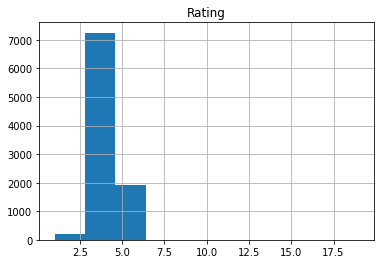

In [18]:
apps_df.hist()

###To find Average App Rating

In [19]:
apps_df['Rating'].mean()#average App Rating

4.193338315362448

In [20]:
apps_df.nunique()#to understand unique values

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [21]:
apps_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [25]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#<B> Cleaning Data

In [26]:
apps_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## To check how many ratings are more than 5 - Outliers

In [30]:
apps_df[apps_df.Rating > 5] # To check the rating value>5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
apps_df.drop(apps_df.index[10472], inplace=True)# Row 10472 removed due to missing value of Category

###Row 10472 removed due to data mismatch in the category

In [32]:
apps_df[10470:10475]#To check whether row 10472 has been removed or not.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


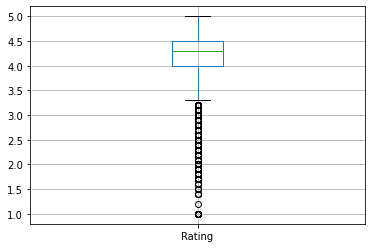

In [33]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6246a8b90>]],
      dtype=object)

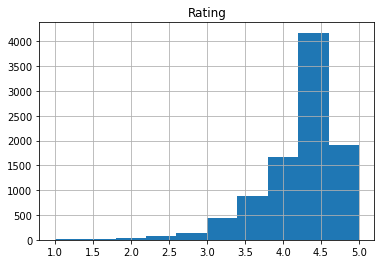

In [34]:
apps_df.hist()

##Data Imputation and Manipulation
Fill the null values with appropriate values using aggreagate functions such as mean,median or mode.

In [37]:
def inpute_median(series):
  return series.fillna(series.median())#Define a function inpute_median

In [38]:
apps_df.Rating = apps_df['Rating'].transform(inpute_median)

In [39]:
apps_df.isnull().sum()#count the number of null values to each column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [40]:
#modes of categorical values
print(apps_df['Type'].mode())
print(apps_df['Current Ver'].mode())
print(apps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [41]:
# Fill the missing categorical values with mode
apps_df['Type'].fillna(str(apps_df['Type'].mode().values[0]),inplace=True)
apps_df['Current Ver'].fillna(str(apps_df['Current Ver'].mode().values[0]),inplace=True)
apps_df['Android Ver'].fillna(str(apps_df['Android Ver'].mode().values[0]),inplace=True)

In [42]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###Converting Price and Installs into Numerical Values.

In [43]:
apps_df['Price'] = apps_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
apps_df['Price'] = apps_df['Price'].apply(lambda x: float(x))#Removing '$' from the values.

In [44]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: float(x))#Removing '+' from the values.

In [45]:
apps_df.info()#Check for missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [46]:
apps_df['Installs'].min(),apps_df['Installs'].max()

(0.0, 1000000000.0)

###Hence, there is a high variance in the number of installs,we need to remove this. For that, we are adding a new column to dataframe, which is the log of number of installs.

In [47]:
apps_df['log_installs'] = np.log2(apps_df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


###Checking, if the dataframe contains any duplicate values for the same App name.


In [48]:
boolean = apps_df['App'].duplicated().any()
boolean

True

In [49]:
apps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
Flight Simulator X 2016 Free                         1
AJ Wallpapers                                        1
Al-Moazin Lite (Prayer Times)                        1
Fox Business                                         1
Bg Radios - Bulgarian radio stations online          1
Name: App, Length: 9659, dtype: int64

###In the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not.


In [50]:
apps_df[apps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1701,ROBLOX,GAME,4.5,4447346,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1748,ROBLOX,GAME,4.5,4448791,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1841,ROBLOX,GAME,4.5,4449882,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1870,ROBLOX,GAME,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425


###As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.


In [51]:
apps_df.drop_duplicates(inplace=True)

###Converting type of Reviews column to number


In [53]:
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'].str.replace('$',''))

In [54]:
apps_df = apps_df.loc[apps_df.groupby(['App'])['Reviews'].idxmax()]

In [58]:
apps_df.describe()#Summary statistics after cleaning

,Rating,Reviews,Installs,Price,log_installs
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000,9659.000000
mean,4.192463,2.168041e+05,7.798170e+06,1.097231,-inf
std,0.496055,1.831430e+06,5.376973e+07,16.851618,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.000000,-inf
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,9.965784
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,16.609640
75%,4.500000,2.945350e+04,1.000000e+06,0.000000,19.931569
max,5.000000,7.815831e+07,1.000000e+09,400.000000,29.897353


#<B> Exploratory analysis

###Setting up the parameters for the plots




In [96]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

###What are the top 20 apps present in the Play store as per their Genres?


In [59]:
top_genres = apps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [60]:
genres_installs = apps_df.groupby(['Genres'])[['Installs']].sum()

In [61]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


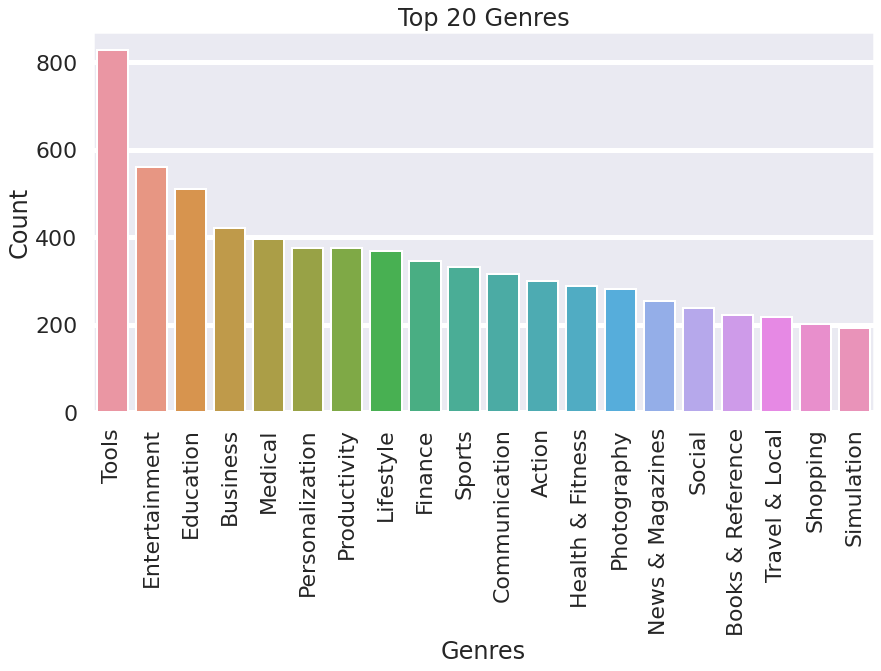

In [92]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

###Which are the Genres that are getting installed the most in top 20 Genres?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


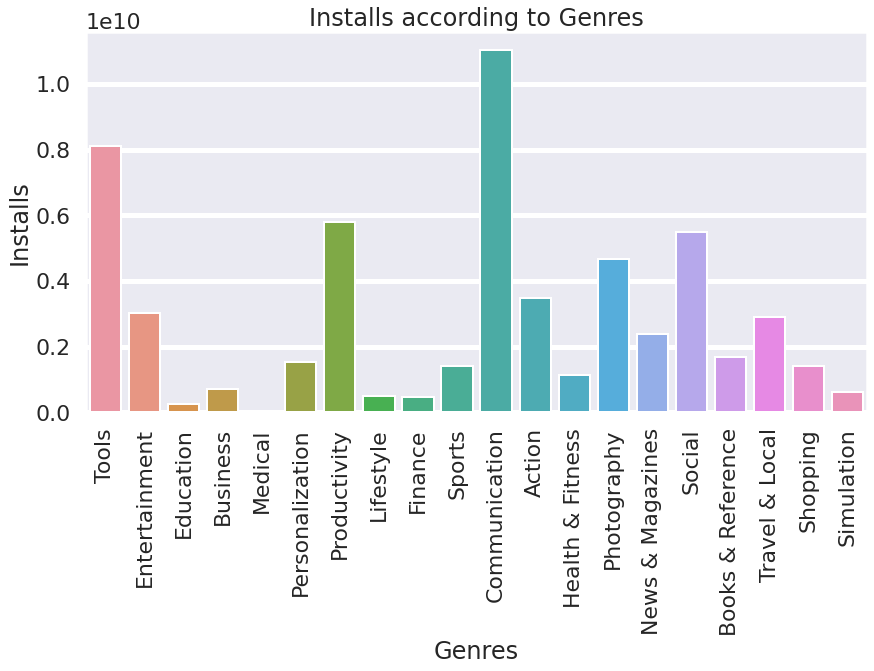

In [83]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

###From the above two plots: Maxinum number of apps present in play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [70]:
top_category = apps_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [71]:
category_installs = apps_df.groupby(['Category'])[['Installs']].sum()

In [72]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


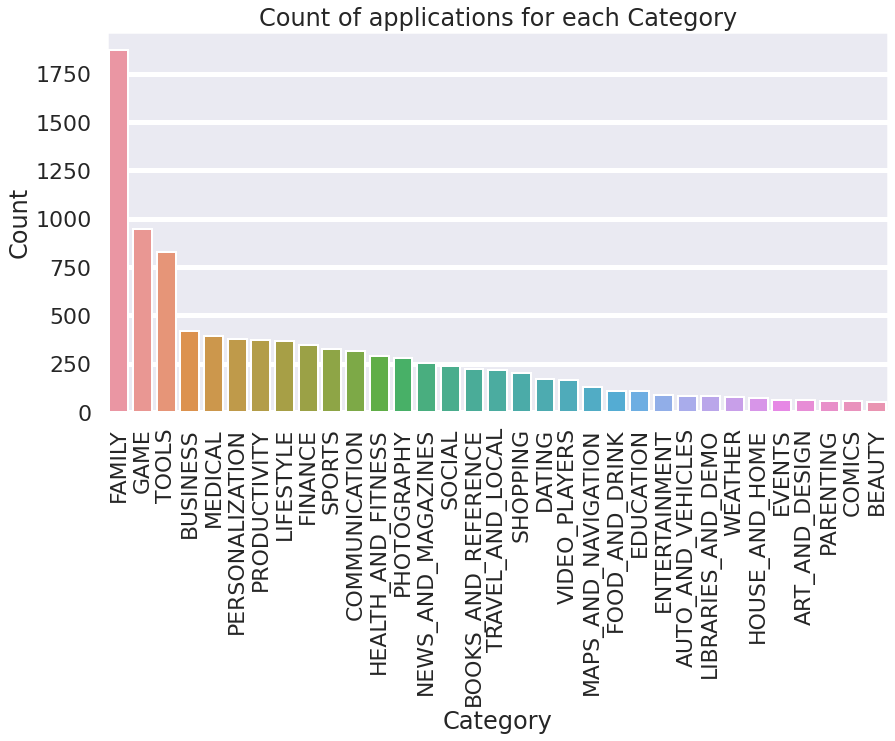

In [73]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


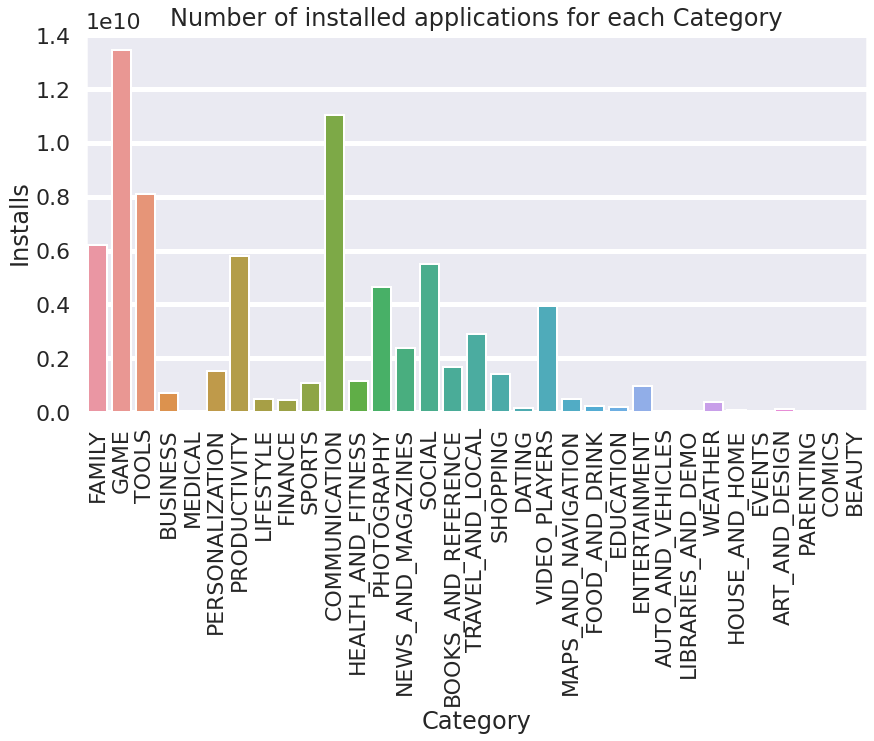

In [74]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.show()

###From the above two plots: Maximum number of apps present in play store comes under Family, Game and Tools Category but as per the number of installed applications for each category is not the same. Maximum installed apps comes under Game, Communication and Tools category.

###Checking the Average rating

In [75]:
genres_ratings_df = apps_df.groupby(['Genres'])[['Rating']].mean()

In [76]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [77]:
genres_installs_ratings['Rating'].describe()

count    118.000000
mean       4.258494
std        0.169659
min        3.800000
25%        4.155364
50%        4.260948
75%        4.341071
max        4.800000
Name: Rating, dtype: float64

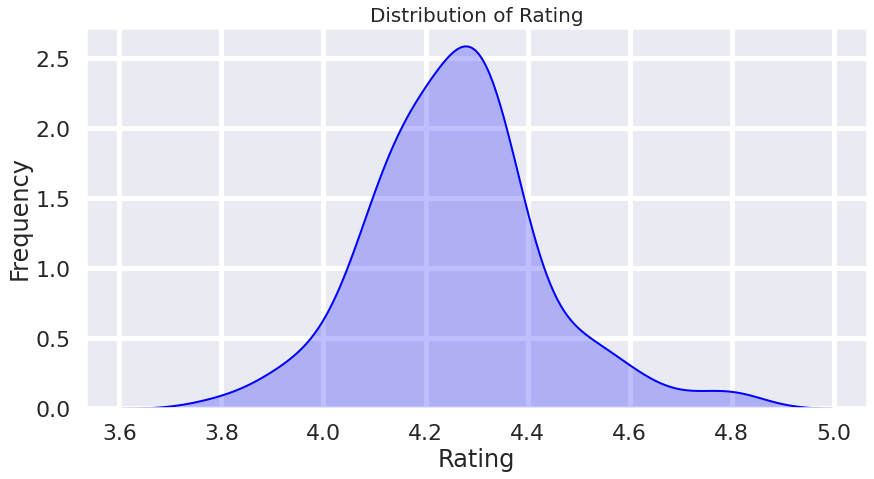

In [97]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

##Which category has the highest Average Rating

In [98]:
apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)# To understand the highest Average Rating?

Category
EVENTS                 4.395313
ART_AND_DESIGN         4.357377
EDUCATION              4.354206
BOOKS_AND_REFERENCE    4.334234
PERSONALIZATION        4.325532
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
WEATHER                4.248101
GAME                   4.247357
SHOPPING               4.238119
SPORTS                 4.232923
LIBRARIES_AND_DEMO     4.207143
PRODUCTIVITY           4.206150
AUTO_AND_VEHICLES      4.205882
MEDICAL                4.201519
FAMILY                 4.197439
FOOD_AND_DRINK         4.191964
COMICS                 4.185714
BUSINESS               4.173810
HOUSE_AND_HOME         4.167123
PHOTOGRAPHY            4.165125
NEWS_AND_MAGAZINES     4.156693
COMMUNICATION          4.154921
FINANCE                4.138551
LIFESTYLE              4.131436
ENTERTAINMENT          4.129885
TRAVEL_AND_LOCAL       4.103196
TOOLS                  4.074427
VIDEO_PLAYERS          4.068293

###Highest rated Genres


In [99]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [101]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


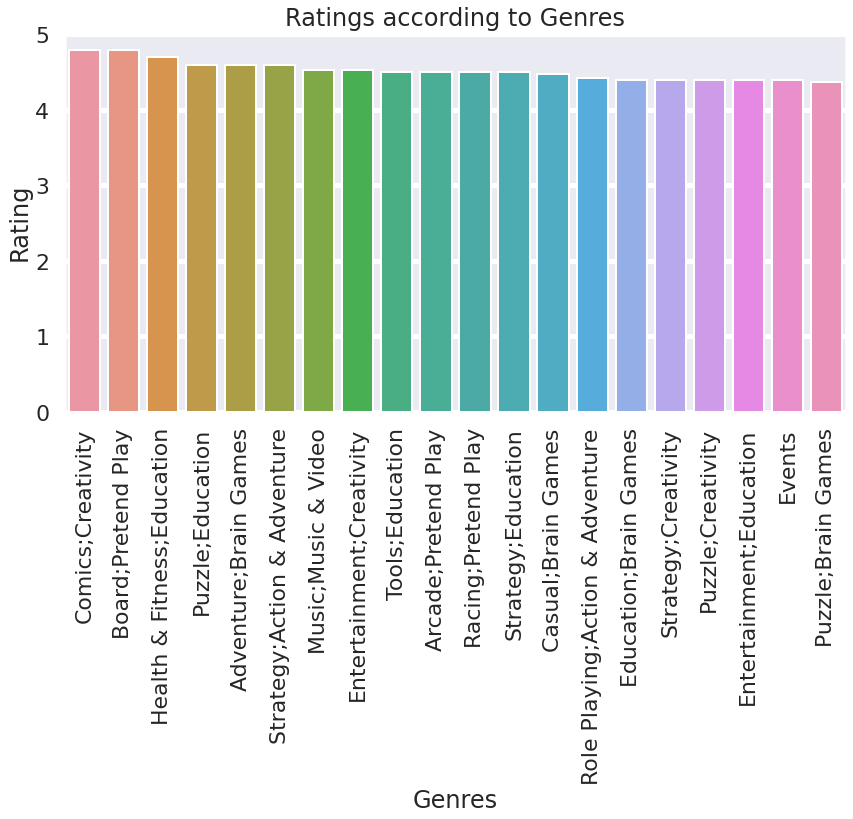

In [103]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

###Lowest rated Genres

In [104]:
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


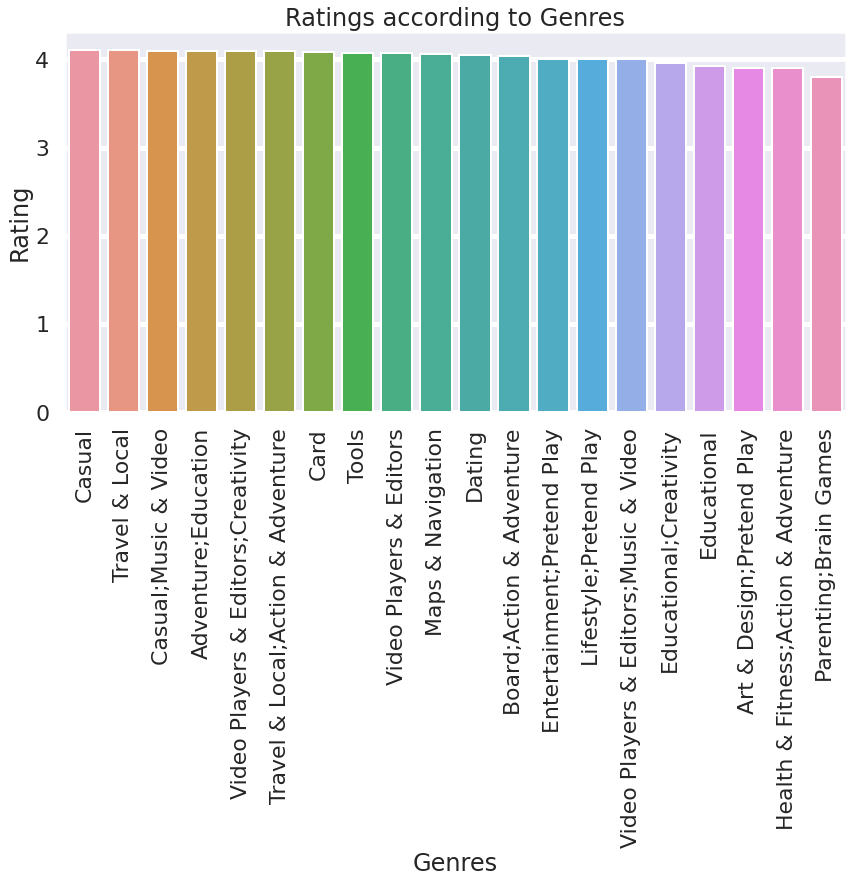

In [105]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

###The count of applications in each category differentiated by their type?


In [106]:
app_count = apps_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [107]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

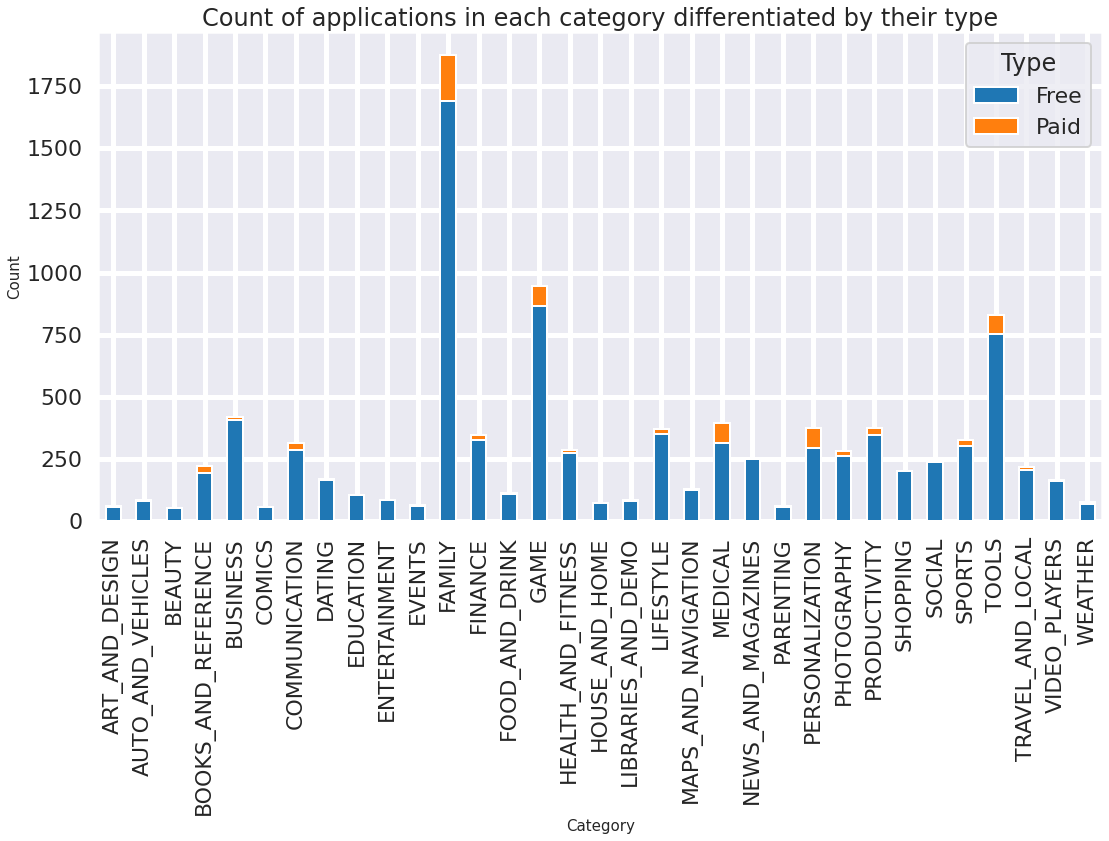

In [108]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

###Certain app categories have more free apps available for download than others. 
###In our dataset, the majority of apps in Family, Game and Tools, as well as Business categories were free to install. 
###At the same time Family, Game, Tools and Medical categories had the biggest number of paid apps available for download.


#How many apps were installed according to its type?


In [114]:
apps_df['Gaming Category App'] = apps_df['Category']=='GAME'

In [115]:
categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [116]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


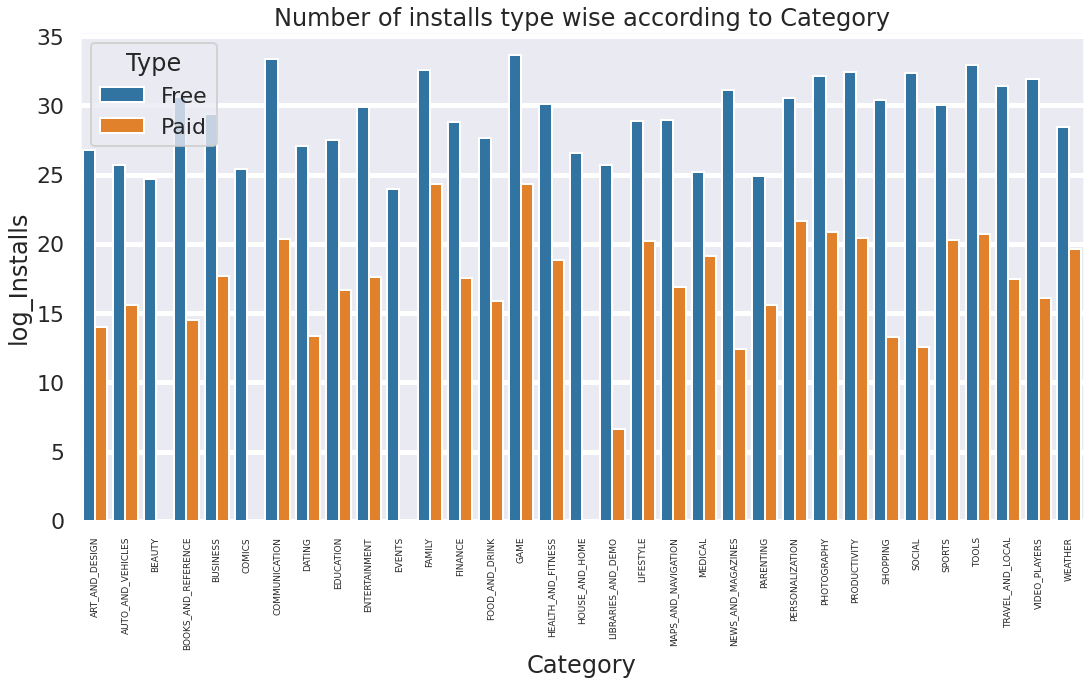

In [118]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

## Total number of free and paid apps

In [119]:
apps_df['Type'].value_counts()# To know the total number of free and paid apps.

Free    8905
Paid     754
Name: Type, dtype: int64

###The Average rating of free and paid apps

In [120]:
apps_df.groupby('Type')['Rating'].mean()#To find the average rating of free and paid apps 

Type
Free    4.185918
Paid    4.269761
Name: Rating, dtype: float64

##Therefore, it can be concluded that the number of free applications installed by the users are high when compared with the paid ones.

##Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [129]:
# Converting KB to MB 
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)


##How does size impact on the number of installs of any application?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

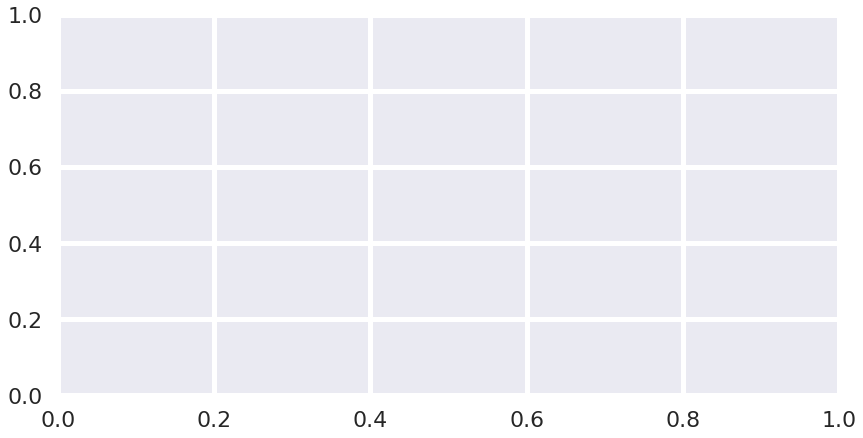

In [130]:
plt.figure(figsize=(14,7))
sns.scatterplot(apps_df['Size'], apps_df['log_installs'], hue=apps_df['Type'])
plt.show()

## Total Number of Apps having 5 star Rating

In [ ]:
len(apps_df[apps_df['Rating']==5.0])#To find total number of Apps having 5 star Rating

274

[link text](https://)## The App got maximum reviews.

In [ ]:
apps_df[apps_df['Reviews'].max()==apps_df['Reviews']]['App']# To understand which App has got maximum Reviews.

2989    GollerCepte Live Score
Name: App, dtype: object

##Display Top 5 Apps having highest reviews.

In [ ]:
index=apps_df['Reviews'].sort_values(ascending=False).head().index# To display Top 5 Apps having Highest Reviews

In [ ]:
apps_df.iloc[index]['App']

2989               GollerCepte Live Score
4970         Ad Block REMOVER - NEED ROOT
2705                  SnipSnap Coupon App
2723                  SnipSnap Coupon App
3079    US Open Tennis Championships 2018
Name: App, dtype: object

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

In [ ]:
apps_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
apps_df['Installs'].dtype #to understand the type of Installs.

dtype('O')



---



> Indented block



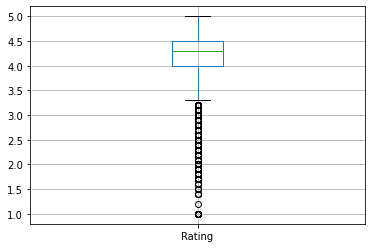

ValueError: ignored

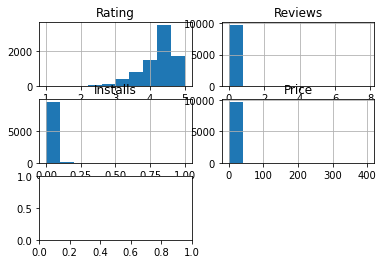

In [ ]:
apps_df.hist()#Rightly skewed, prefer Median values

In [ ]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


##<b> Data Visualization



In [ ]:
grp = apps_df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)#grouping all apps storing in grp

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

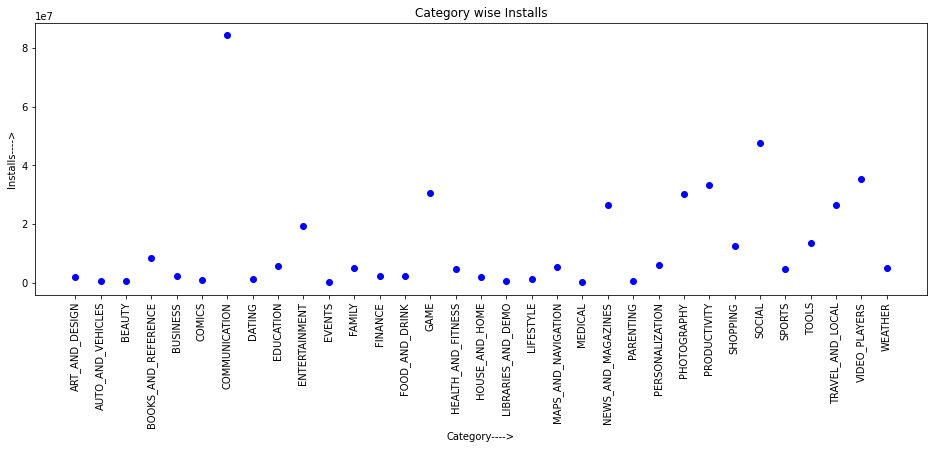

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x, 'ro',color = 'b')
plt.xticks(rotation=90)
plt.title('Category wise Installs')
plt.xlabel('Category---->')
plt.ylabel('Installs---->')
plt.show()

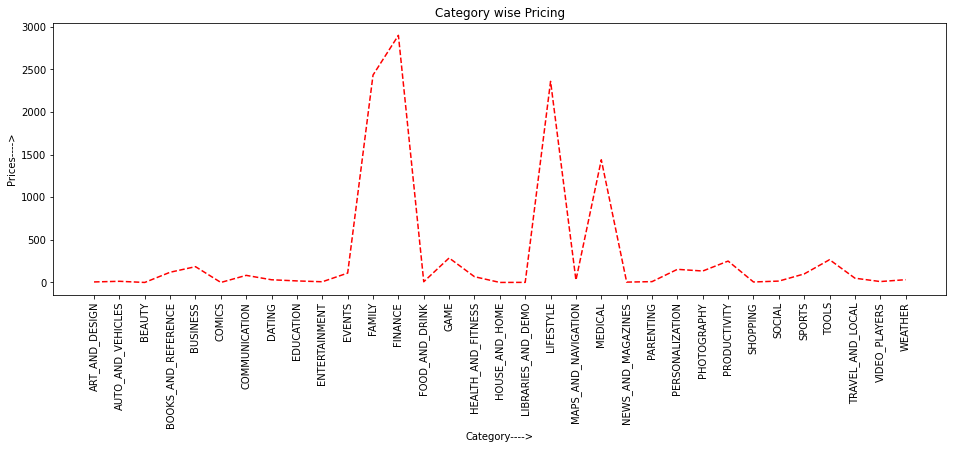

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Category---->')
plt.ylabel('Prices---->')
plt.show()

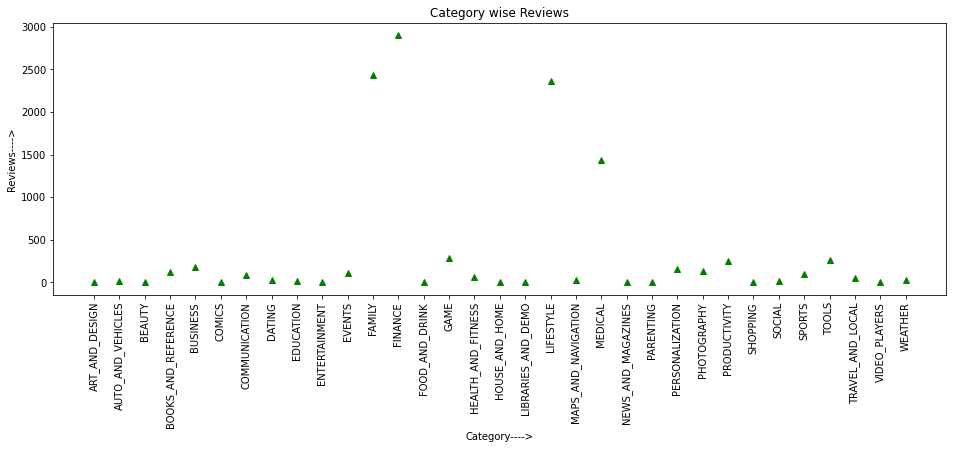

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'g^', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Category---->')
plt.ylabel('Reviews---->')
plt.show()

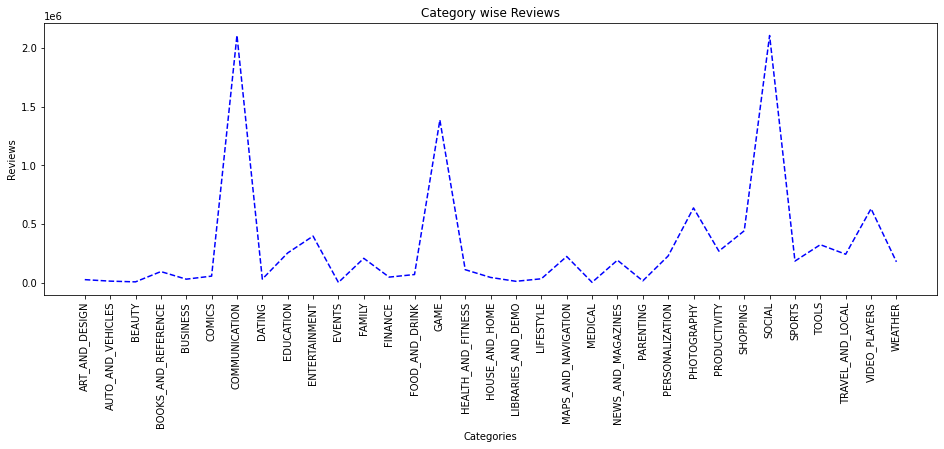

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'g--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()


#<b>ASSUMPTIONS

###<b> Assumption 1: Apps with Ratings 1 to 2.5 would have more negative sentiment reviews.

In [ ]:
apps_rated_0_to_2_5_filter = (apps_df.Rating >= 0) & (apps_df.Rating < 2.5)
selected_columns = ['App', 'Rating', 'Reviews']
apps_rated_0_to_2_5_df = apps_df[apps_rated_0_to_2_5_filter][selected_columns]
apps_rated_0_to_2_5_df


,App,Rating,Reviews
518,Just She - Top Lesbian Dating,1.9,953
554,Just She - Top Lesbian Dating,1.9,953
625,House party - live chat,1.0,1
663,Just She - Top Lesbian Dating,1.9,954
2403,5 Minute Veterinary Consult: Canine & Feline,2.3,17
...,...,...,...
10424,First Hawaiian Bank Mobile,2.1,232
10458,Candy simply-Fi,2.1,2390
10562,FK Atlantas,1.5,2
10578,Check Lottery Tickets - Florida,2.0,27


In [ ]:
selected_columns = ['App', 'Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
reviews_df[selected_columns]



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
reviews_rated_0_to_2_5_df = apps_rated_0_to_2_5_df.merge(reviews_df[selected_columns], on='App')
reviews_rated_0_to_2_5_df


,App,Rating,Reviews,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Hence, could not find any reviews for apps rated in the user reviews dataset. Apps that have ratings between 0 to 2.5, no (zero) Apps have reviews in the user reviews dataset, just a rating. Although we were expecting most of them to have Negative review sentiment (and maybe some Neutral ones) but now it's hard to tell if no review has been left for the reason they were unhappy with the App or did they not get translated (or it's a data issue).

##<b> Assumption 2: 
Apps with Ratings 2.5 to 3.5 would have more neutral sentiment Reviews

In [ ]:
apps_rated_2_5_to_3_5_filter = (apps_df.Rating >= 2.5) & (apps_df.Rating < 3.5)
selected_columns = ['App', 'Rating', 'Reviews']
apps_rated_2_5_to_3_5_df = apps_df[apps_rated_2_5_to_3_5_filter][selected_columns]
apps_rated_2_5_to_3_5_df


,App,Rating,Reviews
15,Learn To Draw Kawaii Characters,3.2,55
87,RST - Sale of cars on the PCT,3.2,250
159,Cloud of Books,3.3,1862
176,Free Book Reader,3.4,1680
209,Plugin:AOT v5.0,3.1,4034
...,...,...,...
10757,Fisher-Price® Smart Connect™,2.7,422
10765,Chat For Strangers - Video Chat,3.4,622
10766,FreedomPop Diagnostics,2.9,452
10819,Fanfic-FR,3.3,52


In [ ]:
selected_columns = ['App', 'Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
reviews_df[selected_columns]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
reviews_rated_2_5_to_3_5_df = apps_rated_2_5_to_3_5_df.merge(reviews_df[selected_columns],on='App')
reviews_rated_2_5_to_3_5_df


,App,Rating,Reviews,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
1,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
2,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
3,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
4,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1675,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1676,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1677,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1678,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
